<a href="https://colab.research.google.com/github/DatumLearning/SSD_using_OpenCV/blob/main/ssd_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DatumLearning/SSD_using_OpenCV.git

Cloning into 'SSD_using_OpenCV'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), 20.55 MiB | 6.27 MiB/s, done.


In [2]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [3]:
classNames = { 0: 'background',
    1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
    5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
    10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
    14: 'motorbike', 15: 'person', 16: 'pottedplant',
    17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

In [4]:
proto = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.prototxt"
weights = "/content/SSD_using_OpenCV/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(proto , weights)

In [5]:
img = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
img_resized = cv2.resize(img , (300 , 300))

In [6]:
blob = cv2.dnn.blobFromImage(img_resized , 0.007843 , (300 , 300) , 
                             (127.5 , 127.5 , 127.5) , False)
net.setInput(blob)
detections = net.forward()

In [7]:
height , width , _ = img.shape

In [8]:
final = detections.squeeze()

In [9]:
final.shape

(100, 7)

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX

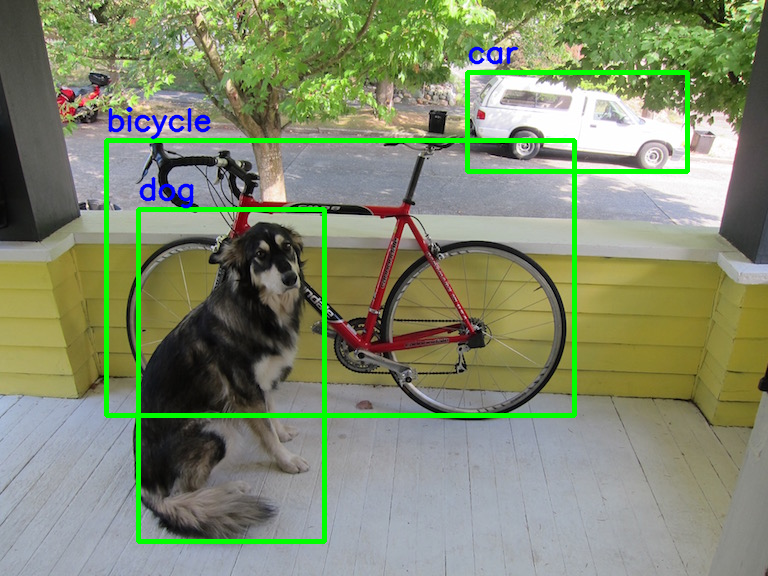

In [11]:
ig = cv2.imread("/content/SSD_using_OpenCV/doggo.jpg")
for i in range(final.shape[0]):
  conf = final[i , 2]
  if conf > 0.5:
    class_name = classNames[final[i , 1]]
    x1 , y1 , x2 , y2 = final[i , 3:]
    x1 *= width
    y1 *= height
    x2 *= width
    y2 *= height
    top_left = (int(x1) , int(y1))
    bottom_right = (int(x2) , int(y2))
    ig = cv2.rectangle(ig , top_left , bottom_right , (0 , 255 , 0) , 3)
    ig = cv2.putText(ig , class_name , (int(x1) , int(y1) - 10) , font , 
                     1 , (255 , 0 , 0) , 2 , cv2.LINE_AA)
cv2_imshow(ig)